In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


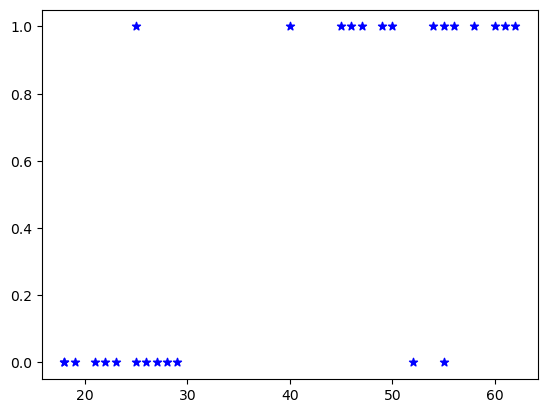

In [3]:
plt.scatter(df.age, df.bought_insurance, marker="*", color="blue")

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.15)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
X_test

,age
11,28
13,29
0,22
4,46
12,27


In [44]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0], dtype=int64)

In [45]:
model.score(X_test, y_test)

1.0

In [46]:
model.predict_proba(X_test)

array([[0.7406209 , 0.2593791 ],
       [0.71801852, 0.28198148],
       [0.85023734, 0.14976266],
       [0.26647166, 0.73352834],
       [0.76201207, 0.23798793]])

In [47]:
from sklearn import metrics
import seaborn as sns

In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 0],
       [0, 1]], dtype=int64)

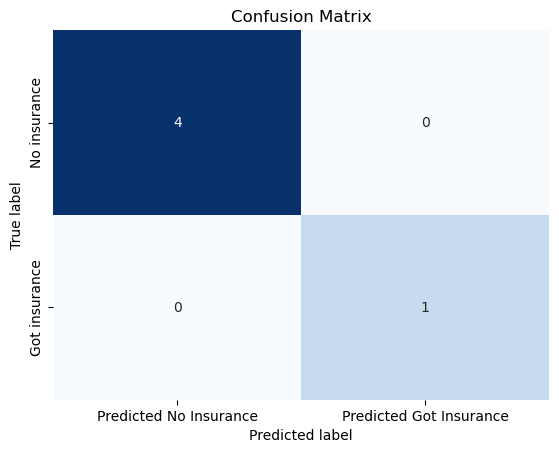

In [50]:
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar = False, xticklabels=['Predicted No Insurance', 'Predicted Got Insurance'], yticklabels=['No insurance', 'Got insurance'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()